In [1]:
import os
from astropy.table import Table, vstack, Column
from astropy.io import ascii
import scipy, pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits

/u/tmakinen/anaconda3/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
legacyid = Table.read("legacy-brick-id.csv")

lsbg_tab = Table()

for i in range(len(legacyid['brick'])):
    brick = legacyid['brick'][i]      # get brick number and objid from the csv file for Johnny's objects
    objid = legacyid['objid'][i]      # get objid from the csv file for Johnny's objects
    trctr = brick[0:3]                # cut out first three digits to get the tractor file number
    
    fname = '/scratch/jgreco/tractor/%s/tractor-%s.fits' %(trctr, brick)
    
    tab = Table.read(fname)           # create a table for each filename
    
    lsbg_tab = vstack([lsbg_tab, tab[objid]])   # stack every desired row into the lsbg table for reference


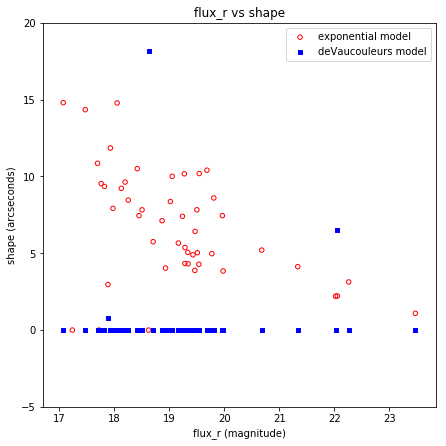

In [3]:
#------make the plot of the different lsbg shapes versus flux (in magnitude)----#
fig = plt.figure(111, figsize=(6.3, 6.3))
ax1 = pylab.subplot(111)

indxs = []



for i in range(len(lsbg_tab["flux_r"])):                             # get rid of any zero flux values
    if lsbg_tab["flux_r"][i] > 0:
        indxs.append(i)
        
exp = np.zeros(len(indxs))                                       # exponential half-light radius
dev = np.zeros(len(indxs))                                       # deVaucouleur radius
flux_mag = np.zeros(len(indxs))
        
for i in range(len(indxs)):
    exp[i] = lsbg_tab["shapeexp_r"][indxs[i]]
    dev[i] = lsbg_tab["shapedev_r"][indxs[i]]
    flux_mag[i] = 22.5 - 2.5*np.log10(lsbg_tab["flux_r"][indxs[i]]) # convert nanomaggies to flux magnitudes
 
ax1.scatter(flux_mag, exp, s=20, facecolors='none', edgecolors='r', label='exponential model')
ax1.scatter(flux_mag, dev, s=20, c = 'b', marker = "s", label = 'deVaucouleurs model')




#plt.xlim((20, 23.8))
plt.ylim((-5, 20))
plt.title('flux_r vs shape')
plt.xlabel('flux_r (magnitude)')
plt.ylabel('shape (arcseconds)')

plt.legend(loc='best')
plt.tight_layout()

plt.show()

/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


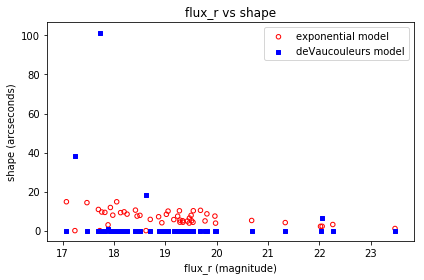

In [4]:
#------make the plot of the different lsbg shapes versus flux (in magnitude)----#
ax1 = pylab.subplot(111)



flux_mag = 22.5 - 2.5*np.log10(lsbg_tab['flux_r'])

 
ax1.scatter(flux_mag, lsbg_tab['shapeexp_r'], s=20, facecolors='none', edgecolors='r', label='exponential model')
ax1.scatter(flux_mag, lsbg_tab['shapedev_r'], s=20, c = 'b', marker = "s", label = 'deVaucouleurs model')



#pylab.ylim([40.8, 42.0])
#pylab.xlim([])
plt.title('flux_r vs shape')
plt.xlabel('flux_r (magnitude)')
plt.ylabel('shape (arcseconds)')

plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [48]:
import pyfits
directory = "/scratch/jgreco/tractor/191"
fname = "/scratch/jgreco/tractor/191/tractor-1914p250.fits"

t1 = pyfits.open(fname)
t2 = pyfits.open("/scratch/jgreco/tractor/191/tractor-1914p252.fits")
nrows1 = t1[1].data.shape[0]
nrows2 = t2[1].data.shape[0]
nrows = nrows1 + nrows2
hdu = pyfits.BinTableHDU.from_columns(t1[1].columns, nrows=nrows)



In [257]:
directory = "/scratch/jgreco/tractor/191" # the directory we're going to work with
# initialize all the arrays I want to construct
flux_r = []
flux_g = []
flux_z = []

shapeexp_r = []

apflux_r = [] 
apflux_g = []
apflux_z = []

psfsize_r = []

# coordinate info
objid = []
typ = []
ra = []
dec = []
apid = ['0.5', '0.75', '1.0', '1.5', '2.0', '3.5', '5.0', '7.0']
aparray_r = [[] for i in range(8)]
aparray_g = [[] for i in range(8)] # create empty list of lists to fill with all aperture vals
aparray_z = [[] for i in range(8)] 

for fname in os.listdir(directory):     # iterate through the directory
    filename = os.fsdecode(fname)
    
    if filename.endswith(".fits"):
        #print(os.path.join(directory, filename))
        
        file = os.path.join(directory, filename)
        t2 = pyfits.open(file)         # open file using pyfits
        data = t2[1].data              # get the data from the file
        
        # get coordinate info
        typ = np.concatenate((np.asarray(typ), data["type"]), axis=0)
        objid = np.concatenate((np.asarray(objid), data["objid"]), axis=0)
        ra = np.concatenate((np.asarray(ra), data["ra"]), axis=0)
        dec = np.concatenate((np.asarray(dec), data["dec"]), axis=0)
        
        #psf_size for r band
        psfsize_r = np.concatenate((np.asarray(psfsize_r), data["psfsize_r"]), axis=0)
        
        # for r band data
        flux_r = np.concatenate((np.asarray(flux_r), data["flux_r"]), axis=0)  # assemble the big flux_r array
        shapeexp_r = np.concatenate((np.asarray(shapeexp_r), data["shapeexp_r"]), axis=0)
        
        for ap in range(len(apid)):   # fill in all aperture arrays in list of arrays
            aparray_r[ap] = np.concatenate((np.asarray(aparray_r[ap]), data["apflux_r"][:,ap])) # get all aperture mags
            aparray_g[ap] = np.concatenate((np.asarray(aparray_g[ap]), data["apflux_g"][:,ap]))
            aparray_z[ap] = np.concatenate((np.asarray(aparray_z[ap]), data["apflux_z"][:,ap]))
        
        
        # for g band data
        flux_g = np.concatenate((np.asarray(flux_g), data["flux_g"]), axis=0)  # assemble the big flux_r array
        #apflux_g = np.concatenate((np.asarray(apflux_g), data["apflux_g"][:,1])) # get just the 0.75 arcsec aperture mags
        
        # for z band data 
        flux_z = np.concatenate((np.asarray(flux_z), data["flux_z"]), axis=0)  # assemble the big flux_r array 
        #apflux_z = np.concatenate((np.asarray(apflux_z), data["apflux_z"][:,1])) # get just the 0.75 arcsec aperture mags
        


In [258]:
# Now let's put all of the arrays into a table object
# ***Note: in Astropy.Table, it's much easier to add columns side-by-side than it is to vstack rows
t = Table()

#t['objid'] = Column(objid, unit='int32', description='Legacy objid')
t['ra'] = Column(ra, unit='deg', description='object right ascension')
t['dec'] = Column(dec, unit='deg', description='object declination')

t['type'] = Column(typ, unit = '', description='object type char[4]')
t['objid'] = Column(objid, unit='', description='integer ID tag for object')

t['flux_r'] = Column(flux_r, unit='nanomaggies', description='flux_r')
t['flux_g'] = Column(flux_g, unit='nanomaggies', description='flux_g')
t['flux_z'] = Column(flux_z, unit='nanomaggies', description='flux_z')

# aperture fluxes

for i in range(8):
    apname_r = "apflux_" + apid[i] + "_r"
    apname_g = "apflux_" + apid[i] + "_g"
    apname_z = "apflux_" + apid[i] + "_z"
    t[apname_r] = Column(aparray_r[i], unit='nanomaggies', description = "apname_r")
    t[apname_g] = Column(aparray_g[i], unit='nanomaggies', description = "apname_g")
    t[apname_z] = Column(aparray_z[i], unit='nanomaggies', description = "apname_z")

t['shapeexp_r'] = Column(shapeexp_r, unit='arcsec', description = 'exponential shape half-light radius')
t['psfsize_r'] = Column(psfsize_r, unit='arcsec', description = 'weighted average PSF FWHM in r band')

#t['apflux_g'] = Column(apflux_g, unit='nanomaggies', description='0.75 arcsec aperture fluxes')
#t['apflux_z'] = Column(apflux_z, unit='nanomaggies', description='0.75 arcsec aperture fluxes')
#t['apflux_r'] = Column(apflux_r, unit='nanomaggies', description='0.75 arcsec aperture fluxes')

ascii.write(t, 'tractor191color.csv', format='csv', fast_writer=False, overwrite=True) 

In [259]:
big_table = Table.read('tractor191color.csv')

In [296]:
big_table.colnames;

In [21]:
max(big_table['psfsize_r'])

2.7246642112699999

In [299]:
# Make cuts to clean up the big table data 
keep = (big_table['flux_r']>0.0) & (big_table['flux_r']<1e3)

keep = (big_table['type']!="PSF ")

cname = big_table.colnames[3:]  # want everything except ra, dec data
for i in range(len(cname)):
    keep &= (big_table[cname[i]]>0.0) & (big_table[cname[i]]<1e3)
    keep &= ~np.isnan(big_table[cname[i]])
    keep &= ~np.isinf(big_table[cname[i]])

t = big_table[keep]

In [301]:
magg = (22.5-np.log10(t["flux_g"]))
magr = (22.5-np.log10(t["flux_r"]))
magz = (22.5-np.log10(t["flux_z"]))
ap_g = (22.5-np.log10(t["apflux_2.0_g"]))
ap_r = (22.5-np.log10(t["apflux_2.0_r"]))
ap_z = (22.5-np.log10(t["apflux_2.0_z"]))

# make magnitude cuts to clean up data
mask = magg < 22.5
mask &= ap_g < 22.5
mask &= (magr<23.) & (magz<23.)
mask &= (ap_r<23.) & (ap_z<23.)

t = t[mask]

In [285]:
t;

In [309]:
magg = (22.5-np.log10(t["flux_g"]))
magr = (22.5-np.log10(t["flux_r"]))
magz = (22.5-np.log10(t["flux_z"]))
ap_g = (22.5-np.log10(t["apflux_2.0_g"]))
ap_r = (22.5-np.log10(t["apflux_2.0_r"]))
ap_z = (22.5-np.log10(t["apflux_2.0_z"]))



ap_gr = ap_g-ap_r
ap_rz = ap_r-ap_z

m_gr = magg-magr
m_rz = magr-magz


ifoo = (m_rz > 0.5) & (m_gr > 1.5)

ra = t["ra"]
dec = t["dec"]

print(ra[ifoo],dec[ifoo],magg[ifoo],magr[ifoo],t['objid'][ifoo])

#print(magg[0:9]-magr[0:9],ap_g[0:9]-ap_r[0:9])

 ra
--- dec
--- flux_g
------ flux_r
------ objid
-----


In [192]:
psf = t['psfsize_r']


ap0 = np.where((psf>0.0) & (psf<0.625))
ap1 = np.where((psf>=0.625) & (psf<0.825), psf, 0)
ap2 = np.where((psf>=0.825) & (psf<1.25), psf,0)
ap3 = np.where((psf>=1.25) & (psf<1.75), psf, 0)
ap4 = np.where((psf>=1.75) & (psf<2.5), psf, 0)
ap5 = np.where((psf>=2.5) & (psf<4.), psf, 0)

In [213]:
indx = []
uplim = 0.9    # percentage of total flux to be a point source in psfsize aperture
for i in range(len(t['psfsize_r'])):
    if (t['psfsize_r'][i]>0.0) & (t['psfsize_r'][i]<0.625):
        ap = "apflux_0.5_r"
    elif (t['psfsize_r'][i]>=0.625) & (t['psfsize_r'][i]<0.825):
        ap = "apflux_0.75_r"
    elif (t['psfsize_r'][i]>=0.825) & (t['psfsize_r'][i]<1.25):
        ap = "apflux_1.0_r"
    elif (t['psfsize_r'][i]>=1.25) & (t['psfsize_r'][i]<1.75):
        ap = "apflux_1.5_r"
    elif (t['psfsize_r'][i]>=1.75) & (t['psfsize_r'][i]<2.5):
        ap = "apflux_2.0_r"
    elif (t['psfsize_r'][i]>=2.5) & (t['psfsize_r'][i]<4):
        ap = "apflux_3.5_r"

    if (t[ap][i] / t["flux_r"][i] < uplim):
        indx += [i]
        

In [214]:
bigmask = np.asarray(indx)
len(bigmask)

522409

In [148]:
bigmask = np.append(np.where(mask0)[0], np.where(mask1)[0])
bigmask = np.append(bigmask, np.where(mask2)[0])
bigmask = np.append(bigmask, np.where(mask3)[0])
bigmask = np.append(bigmask, np.where(mask4)[0])
bigmask = np.append(bigmask, np.where(mask5)[0])

In [154]:
len(t["flux_r"]) - len(bigmask)

330666

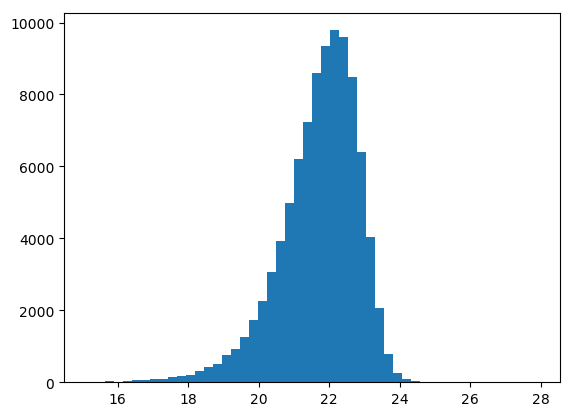

In [265]:
plt.hist(22.5 - 2.5*np.log10(t['flux_r']), bins=50)

plt.show()

In [ ]:
(np.argwhere((22.5 - 2.5*np.log10(t["apflux_r"]))>28)

/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


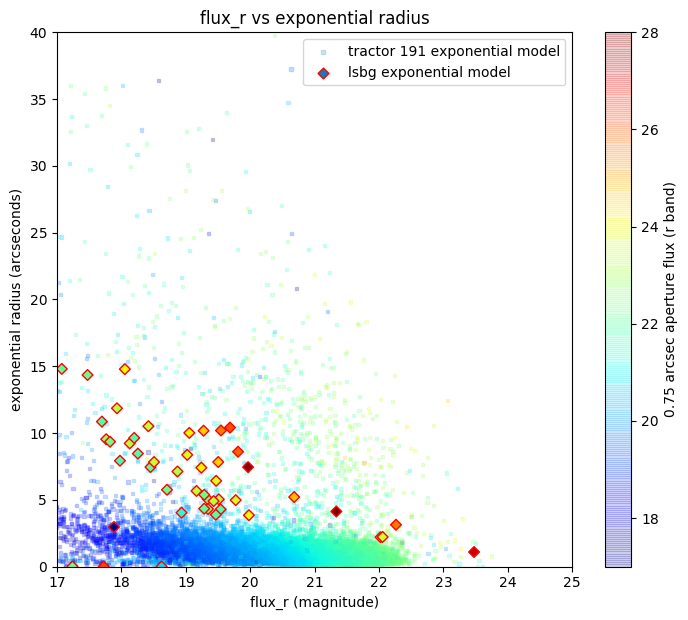

In [276]:
#------make the plot of the different lsbg shapes versus flux (in magnitude) with comparison objects----#
plt.style.use('default')
fig = plt.figure(221, figsize=(7.3, 6.3))
ax1 = plt.subplot(111)


# convert out of nanomaggies (lol) #
flux_mag = 22.5 - 2.5*np.log10(lsbg_tab['flux_r'])
tractor_flux = 22.5 - 2.5*np.log10(t['flux_r'])

# get lsbg aperture fluxes for 0.75 arcsec aperture
lsbg_apflux = 22.5 - 2.5*np.log10(lsbg_tab['apflux_r'][:,1])

# create colorbar for aperture fluxes. This is essentially the objects' luminosity profiles
cbar = 22.5 - 2.5*np.log10(t['apflux_2.0_r'])        # use big tractor file for colorbar range
cbarlsbg = lsbg_apflux

#cbarnorm = cbar / cbar.max()        # normalize colorbar to be able to use cool presets

uplim = 28                         # set upper and lower limits for color bar (+3 std dev)
lowlim = 17 

# make cut based on apflux -- indexes where apflux > 20
#cut_indx = np.argwhere(t['apflux_r']>20)


# make scatterplots 
sctrac = ax1.scatter(tractor_flux, t['shapeexp_r'], s=5, c = cbar, marker = "s", cmap=plt.cm.jet, alpha=0.2, label = 'tractor 191 exponential model')

sc = ax1.scatter(flux_mag, lsbg_tab['shapeexp_r'], s=30, c = cbarlsbg, marker='D', cmap=plt.cm.jet, alpha=1, edgecolors='r', label='lsbg exponential model')



plt.xlim((17, 25))
plt.ylim((0, 40))
plt.title('flux_r vs exponential radius')
plt.xlabel('flux_r (magnitude)')
plt.ylabel('exponential radius (arcseconds)')

plt.legend(loc='best')
plt.tight_layout()
sctrac.set_clim([lowlim, uplim])
colorbar = plt.colorbar(sctrac)

colorbar.set_label('0.75 arcsec aperture flux (r band)', rotation=90)



plt.show()

/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


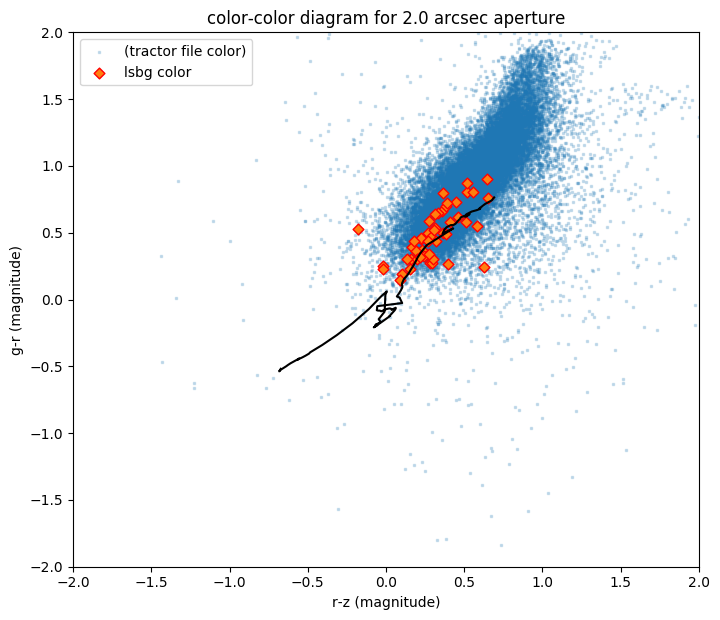

In [305]:
#------make the color-color (g-r), (r-z) band plot----#
plt.style.use('default')
fig = plt.figure(221, figsize=(7.3, 6.3))
ax1 = plt.subplot(111)


# convert out of nanomaggies for lsbg table (lol) #
lsbg_mag_r = 22.5 - 2.5*np.log10(lsbg_tab['flux_r'])
lsbg_mag_g = 22.5 - 2.5*np.log10(lsbg_tab['flux_g'])
lsbg_mag_z = 22.5 - 2.5*np.log10(lsbg_tab['flux_z'])

# get lsbg aperture fluxes for 2.0 arcsec aperture
lsbg_apflux_r = 22.5 - 2.5*np.log10(lsbg_tab['apflux_r'][:,4])
lsbg_apflux_g = 22.5 - 2.5*np.log10(lsbg_tab['apflux_g'][:,4])
lsbg_apflux_z = 22.5 - 2.5*np.log10(lsbg_tab['apflux_z'][:,4])

# for tractor file
mag_r = 22.5 - 2.5*np.log10(t['apflux_2.0_r'])
mag_g = 22.5 - 2.5*np.log10(t['apflux_2.0_g'])
mag_z = 22.5 - 2.5*np.log10(t['apflux_2.0_z'])

# Do the subtraction for ratio of logs

lsgb_gr = lsbg_apflux_g - lsbg_apflux_r
lsgb_rz = lsbg_apflux_r - lsbg_apflux_z

mag_gr = mag_g - mag_r
mag_rz = mag_r - mag_z


# make scatterplots 
sctrac = ax1.scatter(mag_rz, mag_gr, s=1, marker = "s", alpha=0.2, label = '(tractor file color)')
#sctrac = ax1.scatter(ap_rz, ap_gr, s=1, marker = "s", alpha=0.2, label = '(tractor file color)')


sc = ax1.scatter(lsgb_rz, lsgb_gr, s=30, marker='D', alpha=1, edgecolors='r', label='lsbg color')

# add johnny's function
fn = 'bc2003_lr_BaSeL_m52_chab_ssp.1ABmag'
age, u, g, r, i, z = np.loadtxt(fn, unpack=True, usecols=(0,1,2,3,4,5))
# Then, you can plot the track like this:
plt.plot(r-z, g-r, color='k') 



plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.title('color-color diagram for 2.0 arcsec aperture')
plt.xlabel('r-z (magnitude)')
plt.ylabel('g-r (magnitude)')

plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [315]:
ifoo = (mag_rz > 1.5) & (mag_gr > 1.0)

print(t['ra'][ifoo], '\n', t['dec'][ifoo], '\n', t['objid'][ifoo])

      ra     
-------------
191.167709855
 191.11097545
190.972225502
191.022604609
190.999367384
191.018950754
191.089305808
191.085332837
 191.09127879
191.177118118
          ...
191.992650525
191.863344089
191.881325802
191.939733976
192.045173938
192.015199215
192.036759727
191.929950682
 192.02698221
191.958725404
191.969078874
Length = 84 rows 
      dec      
--------------
 10.3996824681
 11.6407027557
 16.6446493954
 23.4534502615
-3.08279216715
-3.83795180652
-4.33742409581
-4.33456227858
-4.32859073808
-4.85190606107
           ...
 16.6692049449
 23.6413154614
-5.61906478874
-5.60342190155
-6.31888786816
-8.10931630825
 13.1512777234
 17.6553411564
 20.9072032448
 21.6298985227
 21.6423443888
Length = 84 rows 
 objid
-----
472.0
324.0
630.0
976.0
873.0
783.0
662.0
668.0
676.0
446.0
  ...
748.0
211.0
139.0
492.0
978.0
495.0
393.0
444.0
593.0
  3.0
170.0
Length = 84 rows


/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


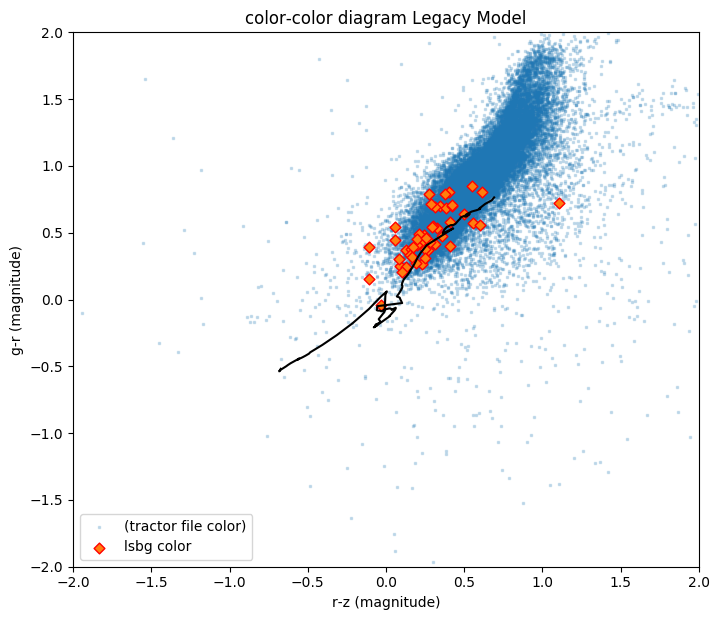

In [306]:
#------make the color-color (g-r), (r-z) band plot----#
plt.style.use('default')
fig = plt.figure(221, figsize=(7.3, 6.3))
ax1 = plt.subplot(111)


# convert out of nanomaggies for lsbg table (lol) #
lsbg_mag_r = 22.5 - 2.5*np.log10(lsbg_tab['flux_r'])
lsbg_mag_g = 22.5 - 2.5*np.log10(lsbg_tab['flux_g'])
lsbg_mag_z = 22.5 - 2.5*np.log10(lsbg_tab['flux_z'])

# get lsbg aperture fluxes for 0.75 arcsec aperture
lsbg_apflux_r = 22.5 - 2.5*np.log10(lsbg_tab['apflux_r'][:,1])
lsbg_apflux_g = 22.5 - 2.5*np.log10(lsbg_tab['apflux_g'][:,1])
lsbg_apflux_z = 22.5 - 2.5*np.log10(lsbg_tab['apflux_z'][:,1])

# for tractor file
mag_r = 22.5 - 2.5*np.log10(t['flux_r'])
mag_g = 22.5 - 2.5*np.log10(t['flux_g'])
mag_z = 22.5 - 2.5*np.log10(t['flux_z'])

# Do the subtraction for ratio of logs

lsgb_gr = lsbg_mag_g - lsbg_mag_r
lsgb_rz = lsbg_mag_r - lsbg_mag_z

mag_gr = mag_g - mag_r
mag_rz = mag_r - mag_z


# make scatterplots 
sctrac = ax1.scatter(mag_rz, mag_gr, s=1, marker = "s", alpha=0.2, label = '(tractor file color)')
#sctrac = ax1.scatter(ap_rz, ap_gr, s=1, marker = "s", alpha=0.2, label = '(tractor file color)')


sc = ax1.scatter(lsgb_rz, lsgb_gr, s=30, marker='D', alpha=1, edgecolors='r', label='lsbg color')

# add johnny's function
fn = 'bc2003_lr_BaSeL_m52_chab_ssp.1ABmag'
age, u, g, r, i, z = np.loadtxt(fn, unpack=True, usecols=(0,1,2,3,4,5))
# Then, you can plot the track like this:
plt.plot(r-z, g-r, color='k') 



plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.title('color-color diagram Legacy Model')
plt.xlabel('r-z (magnitude)')
plt.ylabel('g-r (magnitude)')

plt.legend(loc='best')
plt.tight_layout()

plt.show()

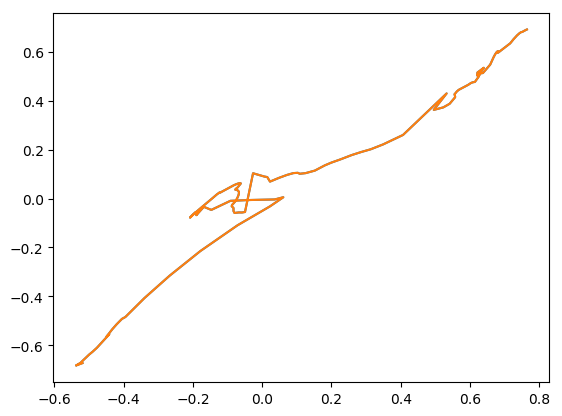

In [15]:
fn = 'bc2003_lr_BaSeL_m52_chab_ssp.1ABmag'
age, u, g, r, i, z = np.loadtxt(fn, unpack=True, usecols=(0,1,2,3,4,5))

# Then, you can plot the track like this:

plt.plot(g-r, r-z) 
plt.show()

In [54]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import math

#------make the plot of the different lsbg shapes versus flux (in magnitude) with comparison objects and side histograms----#

# convert out of nanomaggies (lol) #
lsbg_flux = 22.5 - 2.5*np.log10(lsbg_tab['flux_r'])           # flux
lsbg_apflux = 22.5 - 2.5*np.log10(lsbg_tab['apflux_r'][:,1])  # aperture flux

lsbg_f = lsbg_flux[~np.isnan(lsbg_flux)]
lsbg_af = lsbg_apflux[~np.isnan(lsbg_apflux)]



tractor_flux = 22.5 - 2.5*np.log10(big_table['flux_r'])
tractor_apflux = 22.5 - 2.5*np.log10(big_table['apflux_r'])

tf = tractor_flux[~np.isnan(tractor_flux)]                     # NaNs removed
taf = tractor_apflux[~np.isnan(tractor_apflux)]                 
tf[np.isinf(tf)] = 0.0                                         # infs removed
taf[np.isinf(taf)] = 0.0

    


# create colorbar for aperture fluxes. This is essentially the objects' luminosity profiles
cbar = tractor_apflux               # use big tractor file for colorbar range
cbarnorm = cbar / cbar.max()        # normalize colorbar to be able to use cool presets
uplim = 28                          # set upper and lower limits for color bar (+3 std dev)
lowlim = 17 




# Calculate number of bins based on binsize for both x and y

# For tractor data
min_x_data, max_x_data = 17, 26
binsize = 0.2
num_x_bins = np.floor((max_x_data - min_x_data) / binsize)


min_y_data, max_y_data = np.min(big_table['shapeexp_r']), np.max(big_table['shapeexp_r'])
binsize = 0.2
num_y_bins = np.floor((max_y_data - min_y_data) / binsize)


# Axes definitions
nullfmt = plt.NullFormatter()
left, width = 0.1, 0.4
bottom, height = 0.1, 0.4
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.4]
rect_histy = [left_h, bottom, 0.4, height]


# Generate initial figure, scatter plot, and histogram quadrants
fig = plt.figure(221, figsize=(6.3, 6.3))

# Make ax1 our scatter axis
ax1 = fig.add_subplot(223, position=rect_scatter)
ax1.set_xlabel('flux_r')
ax1.set_ylabel('exponential radius')
ax1.set_xlim(17., 25.)
ax1.set_ylim(0., 40.)

# add the histograms to the sides
axHistX = fig.add_subplot(221, position=rect_histx)
axHistX.set_xlim(17., 25.)
axHistX.set_ylim(0, 10000000.)

axHistY = fig.add_subplot(224, position=rect_histy)
axHistY.set_xlim(0, 10000000.)
axHistY.set_ylim(0., 40.)

# Remove labels from histogram edges touching scatter plot
axHistX.xaxis.set_major_formatter(nullfmt)
axHistY.yaxis.set_major_formatter(nullfmt)

# make the scatterplot
sctrac = ax1.scatter(tractor_flux, big_table['shapeexp_r'], s=5, c = big_table['apflux_r'], marker = "s", cmap=plt.cm.jet, label = 'tractor 191 exponential model')
sc = ax1.scatter(flux_mag, lsbg_tab['shapeexp_r'], s=30, c = lsbg_apflux, marker='D', cmap=plt.cm.jet, edgecolors='r', label='lsbg exponential model')



# make the x-axis histogram
axHistX.hist(tf, num_x_bins, ec='green', fc='none', histtype='bar')


# Draw y-axis histogram
axHistY.hist(big_table["shapeexp_r"], num_y_bins, ec='green', fc='none', histtype='step', orientation='horizontal')


# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('flux_r (magnitude)')
ax_joint.set_ylabel('exponential r_1/2 (arcsecs)')

# Set labels on marginals
ax_marg_y.set_xlabel('flux_r (magnitude)')
ax_marg_x.set_ylabel('exponential r_1/2 (arcsecs)')




plt.title('flux_r vs shape')
plt.legend(loc='best')
plt.tight_layout()
sctrac.set_clim([lowlim, uplim])
plt.colorbar(sctrac)






plt.show()

/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [48]:
tractor_flux = 22.5 - 2.5*np.log10(big_table['flux_r'])
tractor_apflux = 22.5 - 2.5*np.log10(big_table['apflux_r'])

tf = tractor_flux[~np.isnan(tractor_flux)]                     # 1D array with NaNs removed
taf = tractor_apflux[~np.isnan(tractor_apflux)]

/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [51]:
tf[np.isinf(tf)] = 0.0
np.max(tf)

36.195498947533999

In [42]:
#------make the plot of the different lsbg shapes versus flux (in magnitude) with comparison objects and side histograms----#

# convert out of nanomaggies (lol) #
flux_mag = 22.5 - 2.5*np.log10(lsbg_tab['flux_r'])
tractor_flux = 22.5 - 2.5*np.log10(big_table['flux_r'])
# get lsbg aperture fluxes for 0.75 arcsec aperture
lsbg_apflux = 22.5 - 2.5*np.log10(lsbg_tab['apflux_r'][:,1])
# create colorbar for aperture fluxes. This is essentially the objects' luminosity profiles
cbar = 22.5 - 2.5*np.log10(big_table['apflux_r'])        # use big tractor file for colorbar range
cbarnorm = cbar / cbar.max()        # normalize colorbar to be able to use cool presets
uplim = 28                         # set upper and lower limits for color bar (+3 std dev)
lowlim = 17 


# plot parameters

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]    # scatterplot rectangle
rect_histx = [left, bottom_h, width, 0.2]       # histogram rectangles
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))
ax1 = plt.axes(rect_scatter)    # scatter axis
axHistx = plt.axes(rect_histx)  # histogram axes
axHisty = plt.axes(rect_histy)


# make scatterplots 
sctrac = ax1.scatter(tractor_flux, big_table['shapeexp_r'], s=5, c = big_table['apflux_r'], marker = "s", cmap=plt.cm.jet, label = 'tractor 191 exponential model')
sc = ax1.scatter(flux_mag, lsbg_tab['shapeexp_r'], s=30, c = lsbg_apflux, marker='D', cmap=plt.cm.jet, edgecolors='r', label='lsbg exponential model')


# make histograms
# now determine nice limits by hand:
binwidth = 0.25


ax1.set_xlim((17, 25))
ax1.set_ylim((0, 40))

bins = np.arange(17, 25 + binwidth, binwidth)
# flux_r histogram
axHistx.hist(tractor_flux, bins=bins)
axHistx.hist(flux_mag, bins=bins)
                   
# shape histogram
axHisty.hist(big_table['shapeexp_r'], bins=bins, orientation='horizontal')
axHisty.hist(lsbg_tab['shapeexp_r'], bins=bins, orientation='horizontal')

axHistx.set_xlim(ax1.get_xlim())
axHisty.set_ylim(ax1.get_ylim())

                   
                   
plt.title('flux_r vs shape')
plt.xlabel('flux_r (magnitude)')
plt.ylabel('shape (arcseconds)')

plt.legend(loc='best')
plt.tight_layout()
sctrac.set_clim([lowlim, uplim])
plt.colorbar(sctrac)


plt.show()

/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


ValueError: range parameter must be finite.

array([ True], dtype=bool)

In [ ]:
legacyid = Table.read("legacy-brick-id.csv")

lsbg_tab = Table()

for i in range(len(legacyid['brick'])):
    brick = legacyid['brick'][i]      # get brick number and objid from the csv file for Johnny's objects
    objid = legacyid['objid'][i]      # get objid from the csv file for Johnny's objects
    trctr = brick[0:3]                # cut out first three digits to get the tractor file number
    
    fname = '/scratch/jgreco/tractor/%s/tractor-%s.fits' %(trctr, brick)
    
    tab = Table.read(fname)           # create a table for each filename
    
    lsbg_tab = vstack([lsbg_tab, tab[objid]])   # stack every desired row into the lsbg table for reference

In [23]:
os.listdir('/scratch/jgreco/tractor/343')

In [9]:
ascii.write(lsbg_tab, 'legacy-data.csv', format='csv', fast_writer=False, overwrite=True)

In [ ]:
brick = "3376m005"
objid = 5738

In [58]:
trctr = brick[0:3]   #take out the first three digits of the brick to get the tractor number

In [59]:
fname = '/scratch/jgreco/tractor/%s/tractor-%s.fits' %(trctr, brick)
print(fname)

/scratch/jgreco/tractor/337/tractor-3376m005.fits


In [60]:
tab = Table.read(fname)

In [61]:
tab[objid]


release,brickid,brickname,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq [5],ebv,mjd_min,mjd_max,flux_u,flux_g,flux_r,flux_i,flux_z,flux_Y,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_u,flux_ivar_g,flux_ivar_r,flux_ivar_i,flux_ivar_z,flux_ivar_Y,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,apflux_u [8],apflux_g [8],apflux_r [8],apflux_i [8],apflux_z [8],apflux_Y [8],apflux_resid_u [8],apflux_resid_g [8],apflux_resid_r [8],apflux_resid_i [8],apflux_resid_z [8],apflux_resid_Y [8],apflux_ivar_u [8],apflux_ivar_g [8],apflux_ivar_r [8],apflux_ivar_i [8],apflux_ivar_z [8],apflux_ivar_Y [8],mw_transmission_u,mw_transmission_g,mw_transmission_r,mw_transmission_i,mw_transmission_z,mw_transmission_Y,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,nobs_u,nobs_g,nobs_r,nobs_i,nobs_z,nobs_Y,nobs_w1,nobs_w2,nobs_w3,nobs_w4,rchisq_u,rchisq_g,rchisq_r,rchisq_i,rchisq_z,rchisq_Y,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,fracflux_u,fracflux_g,fracflux_r,fracflux_i,fracflux_z,fracflux_Y,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracmasked_u,fracmasked_g,fracmasked_r,fracmasked_i,fracmasked_z,fracmasked_Y,fracin_u,fracin_g,fracin_r,fracin_i,fracin_z,fracin_Y,anymask_u,anymask_g,anymask_r,anymask_i,anymask_z,anymask_Y,allmask_u,allmask_g,allmask_r,allmask_i,allmask_z,allmask_Y,wisemask_w1,wisemask_w2,psfsize_u,psfsize_g,psfsize_r,psfsize_i,psfsize_z,psfsize_Y,psfdepth_u,psfdepth_g,psfdepth_r,psfdepth_i,psfdepth_z,psfdepth_Y,galdepth_u,galdepth_g,galdepth_r,galdepth_i,galdepth_z,galdepth_Y,wise_coadd_id,lc_flux_w1 [7],lc_flux_w2 [7],lc_flux_ivar_w1 [7],lc_flux_ivar_w2 [7],lc_nobs_w1 [7],lc_nobs_w2 [7],lc_fracflux_w1 [7],lc_fracflux_w2 [7],lc_rchisq_w1 [7],lc_rchisq_w2 [7],lc_mjd_w1 [7],lc_mjd_w2 [7],fracdev,fracdev_ivar,shapeexp_r,shapeexp_r_ivar,shapeexp_e1,shapeexp_e1_ivar,shapeexp_e2,shapeexp_e2_ivar,shapedev_r,shapedev_r_ivar,shapedev_e1,shapedev_e1_ivar,shapedev_e2,shapedev_e2_ivar
,,,,,,deg,deg,1/deg^2,1/deg^2,,,,mag,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,arcsec,1/arcsec^2,,,,,arcsec,1/arcsec^2,,,,
int16,int32,str8,int32,bool,str4,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,flo